In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


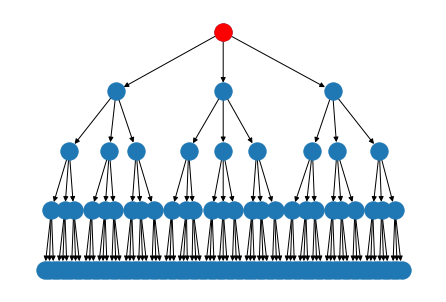

In [2]:
offspring_factor=3
height=4
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r')
plt.show()

In [3]:
#G=utils.random_dag(10,20)
#root=np.random.choice(utils.sources(G))pos=graphviz_layout(G,prog='dot')
#nx.draw(G,pos)
#nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
#plt.show()

In [4]:
def show_pattern_deco(func):
    def wrapper(*args,**kwargs):
        out = func(*args,**kwargs)
        print(args,'-->\n',out)
        return out
    return wrapper
#rw.mutate_pattern=show_pattern_deco(rw.mutate_pattern)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


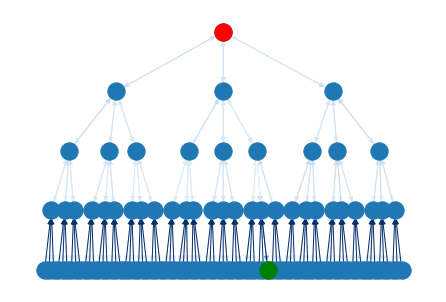

In [5]:
G=rw.patternWalker(H,root,20,0.05)
G.set_weights()
pos=graphviz_layout(G,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'prob').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

In [6]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')

Number of duplicate strings/Number of strings: 45 / 121


/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


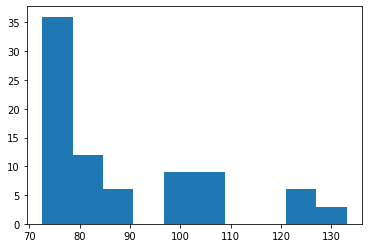

In [7]:
_=plt.hist(mfpts.values())

In [ ]:
temp=[]
for _ in range(100):
    G.reset_patterns()
    G.set_weights()
    mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
    for x in mfpts.values():
        temp.append(x)

In [ ]:
_=plt.hist(temp,bins=20)

In [ ]:
#print(nx.to_dict_of_dicts(G))
#print(G.edges(data=True))
down=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
_=plt.hist(down)